In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


**The following methods were performed to wrangle the data in Excel:**

- Converting `Start Date` from `mm/dd/yy` to `yyyy-mm-dd`

- Converting `Time` from `hhmm` to `hh:mm`

- Changing one `Time` value `UNKNOWN` to `12:00` (middle of the day)

- Combining `Start Date` and `Time` into `DateTime` variable `yyyy-mm-dd hh:mm`

- Adding a `Season` variable based on `Start Date` variable

- Converting all blank values in `Value` to `1/2 * MDL RDQ Measure 2`

In [3]:
# Load data
df = pd.read_csv('SFkFkDeer.csv')

In [4]:
# Convert DateTime to datetime data type (plot can interpret date/time values in order)
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
# Select relevant variables
df = df.loc[:, df.columns.isin(['DateTime', 'Season', 'Characteristic', 'Value', 'Unit'])]
df

,DateTime,Season,Characteristic,Value,Unit
0,1998-12-16 09:15:00,Fall,Conductivity,60.000,umho/cm
1,1999-03-24 11:45:00,Spring,Conductivity,65.000,umho/cm
2,1999-06-09 09:50:00,Spring,Conductivity,127.000,umho/cm
3,1999-09-28 09:50:00,Fall,Conductivity,110.000,umho/cm
4,1999-12-01 11:20:00,Fall,Conductivity,97.000,umho/cm
...,...,...,...,...,...
879,2022-06-29 10:38:00,Summer,Phosphorus,0.130,mg/l
880,2022-09-27 10:55:00,Fall,Phosphorus,0.143,mg/l
881,2022-12-13 10:50:00,Fall,Phosphorus,0.176,mg/l
882,2023-03-09 10:10:00,Winter,Phosphorus,0.147,mg/l


In [6]:
# Define boxplot season order and color palette
order = ['Spring', 'Summer', 'Fall', 'Winter']
palette = ['#7FFF00', '#FF6347', '#FFA500', '#4169E1']

# Conductivity Analysis

## Temporal

In [7]:
df_conductivity = df[df['Characteristic'] == 'Conductivity']

/Users/brookestevens/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/brookestevens/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


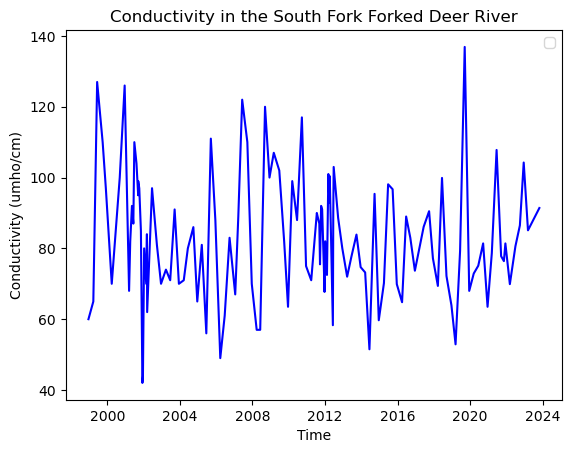

In [8]:
sns.lineplot(x='DateTime', y='Value', data=df_conductivity, color='blue')
plt.title('Conductivity in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Conductivity (umho/cm)')
plt.legend()
plt.show()

## Seasonal

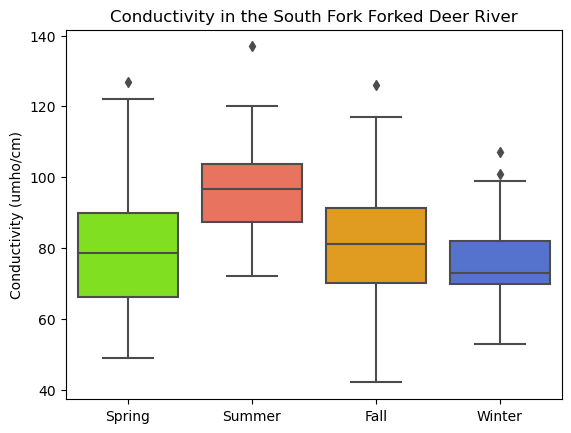

In [9]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_conductivity, order=order, palette=palette)
plt.title('Conductivity in the South Fork Forked Deer River')
plt.ylabel('Conductivity (umho/cm)')
plt.xlabel('')
plt.show()

# Dissolved Oxygen Analysis

## Temporal

In [10]:
df_do = df[df['Characteristic'] == 'Dissolved oxygen (DO)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


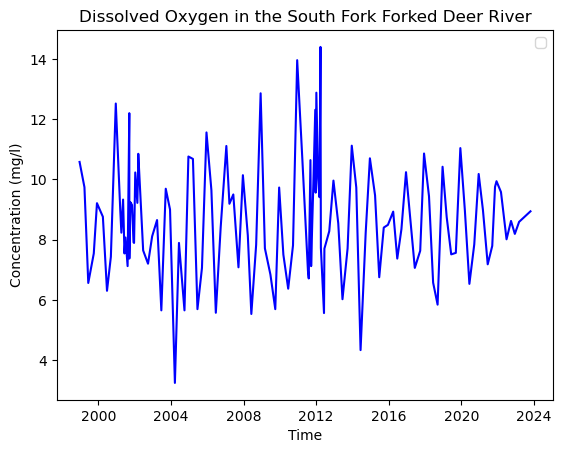

In [11]:
sns.lineplot(x='DateTime', y='Value', data=df_do, color='blue')
plt.title('Dissolved Oxygen in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Concentration (mg/l)')
plt.legend()
plt.show()

## Seasonal

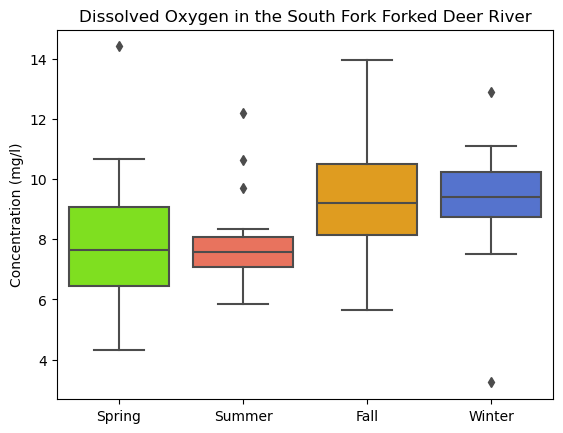

In [12]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_do, order=order, palette=palette)
plt.title('Dissolved Oxygen in the South Fork Forked Deer River')
plt.ylabel('Concentration (mg/l)')
plt.xlabel('')
plt.show()

# pH Analysis

## Temporal

In [13]:
df_ph = df[df['Characteristic'] == 'pH']

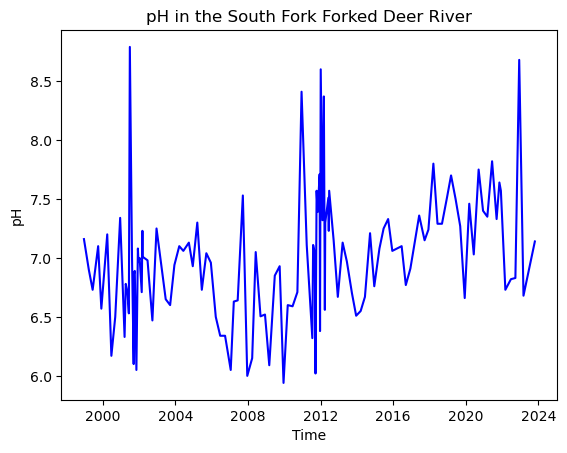

In [14]:
sns.lineplot(x='DateTime', y='Value', data=df_ph, color='blue')
plt.title('pH in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('pH')
plt.show()

## Seasonal

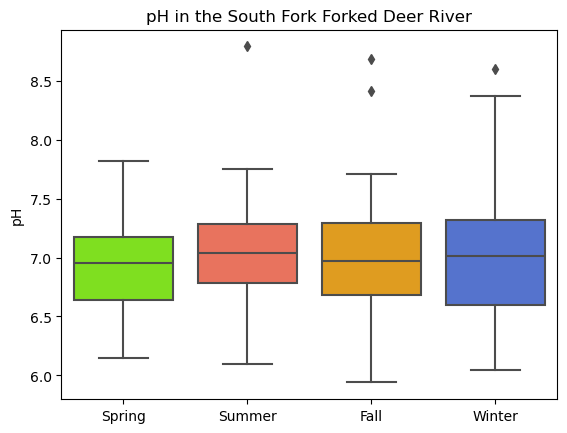

In [15]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_ph, order=order, palette=palette)
plt.title('pH in the South Fork Forked Deer River')
plt.ylabel('pH')
plt.xlabel('')
plt.show()

# Water Temperature Analysis

## Temporal

In [16]:
df_watertemp = df[df['Characteristic'] == 'Temperature, water']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


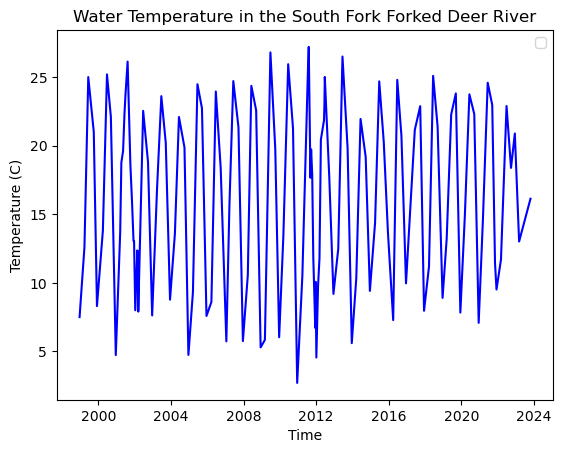

In [17]:
sns.lineplot(x='DateTime', y='Value', data=df_watertemp, color='blue')
plt.title('Water Temperature in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

## Seasonal

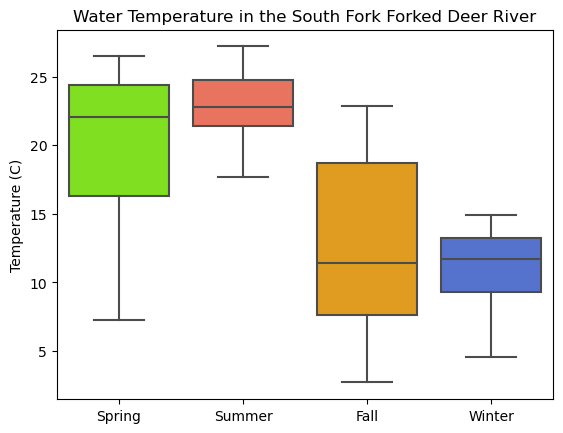

In [18]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_watertemp, order=order, palette=palette)
plt.title('Water Temperature in the South Fork Forked Deer River')
plt.ylabel('Temperature (C)')
plt.xlabel('')
plt.show()

# Ammonia-Nitrogen Analysis

## Temporal

In [19]:
df_ammnit = df[df['Characteristic'] == 'Ammonia-nitrogen']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


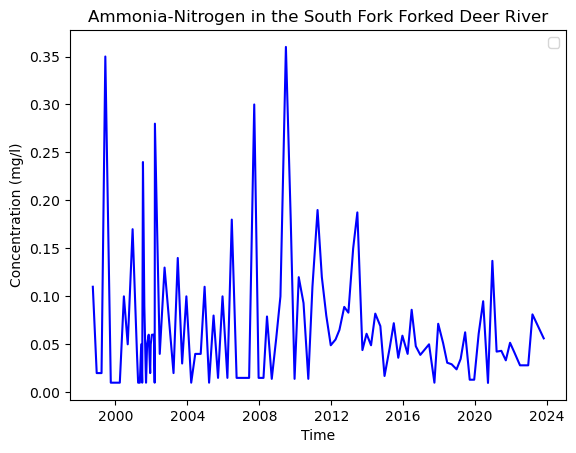

In [20]:
sns.lineplot(x='DateTime', y='Value', data=df_ammnit, color='blue')
plt.title('Ammonia-Nitrogen in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Concentration (mg/l)')
plt.legend()
plt.show()

## Seasonal

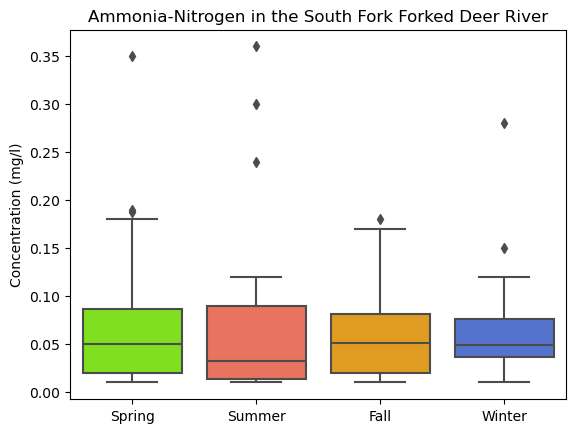

In [21]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_ammnit, order=order, palette=palette)
plt.title('Ammonia-Nitrogen in the South Fork Forked Deer River')
plt.ylabel('Concentration (mg/l)')
plt.xlabel('')
plt.show()

# Kjeldahl Nitrogen Analysis

## Temporal

In [22]:
df_kn = df[df['Characteristic'] == 'Kjeldahl nitrogen']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


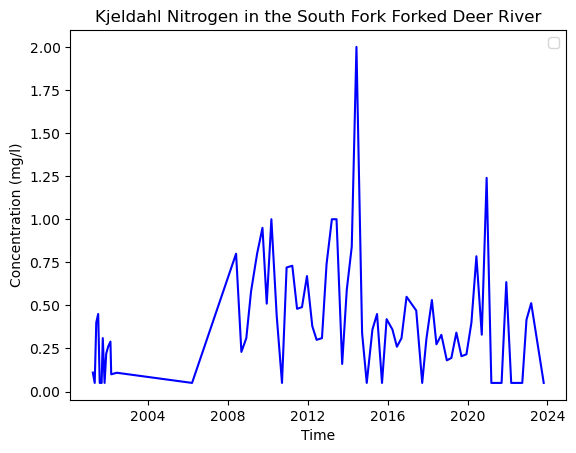

In [23]:
sns.lineplot(x='DateTime', y='Value', data=df_kn, color='blue')
plt.title('Kjeldahl Nitrogen in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Concentration (mg/l)')
plt.legend()
plt.show()

## Seasonal

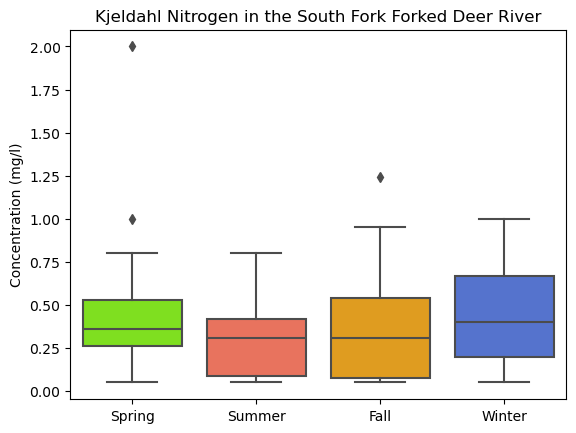

In [24]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_kn, order=order, palette=palette)
plt.title('Kjeldahl Nitrogen in the South Fork Forked Deer River')
plt.ylabel('Concentration (mg/l)')
plt.xlabel('')
plt.show()

# Nitrate + Nitrite Analysis

## Temporal

In [25]:
df_nn = df[df['Characteristic'] == 'Nitrate + Nitrite']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


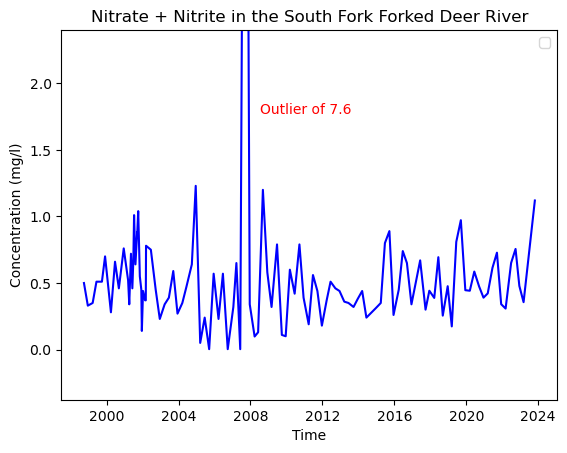

In [26]:
sns.lineplot(x='DateTime', y='Value', data=df_nn, color='blue')
plt.title('Nitrate + Nitrite in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Concentration (mg/l)')
plt.ylim(None, 2.4)
plt.text(15000, 1.8, 'Outlier of 7.6', fontsize=10, color='red', ha='center', va='center')
plt.legend()
plt.show()

## Seasonal

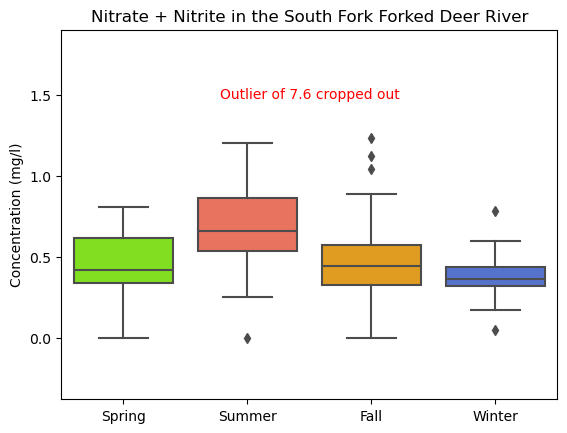

In [27]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_nn, order=order, palette=palette)
plt.title('Nitrate + Nitrite in the South Fork Forked Deer River')
plt.ylim(None, 1.9)
plt.text(1.5, 1.5, 'Outlier of 7.6 cropped out', fontsize=10, color='red', ha='center', va='center')
plt.ylabel('Concentration (mg/l)')
plt.xlabel('')
plt.show()

# Phosphorus Analysis

## Temporal

In [28]:
df_phosphorus = df[df['Characteristic'] == 'Phosphorus']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


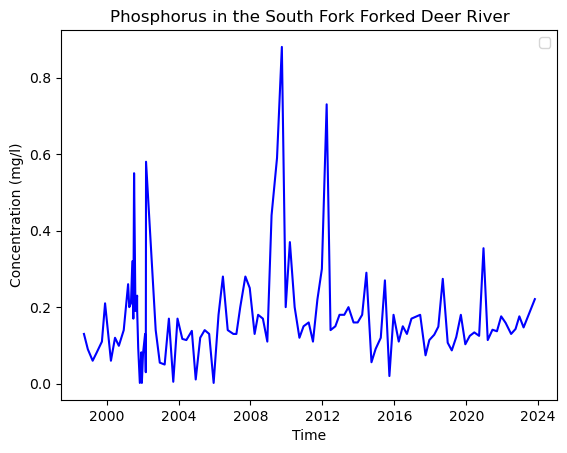

In [29]:
sns.lineplot(x='DateTime', y='Value', data=df_phosphorus, color='blue')
plt.title('Phosphorus in the South Fork Forked Deer River')
plt.xlabel('Time')
plt.ylabel('Concentration (mg/l)')
plt.legend()
plt.show()

## Seasonal

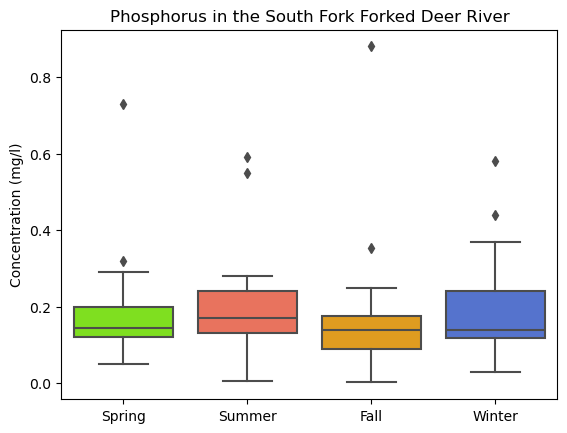

In [30]:
warnings.filterwarnings('ignore')
sns.boxplot(x='Season', y='Value', data=df_phosphorus, order=order, palette=palette)
plt.title('Phosphorus in the South Fork Forked Deer River')
plt.ylabel('Concentration (mg/l)')
plt.xlabel('')
plt.show()